---

## 1.Problem Definition

Predict the Global_Sale
1. Analyse the importance of features that can be of help in increasing the global sales

---

## 2.Dataset Preview

In [78]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [79]:
videoGames=pd.read_csv("Video_Games.csv")
videoGames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


---

## 3.Data Cleaning / Preparation

In [81]:
videoGamesSelected=pd.DataFrame(videoGames[['Platform','Genre','Publisher','Critic_Score','Global_Sales','User_Score','Rating', 'JP_Sales']])
videoGamesSelected = videoGamesSelected[videoGamesSelected.User_Score != "tbd"]
videoGamesSelected["User_Score"] = pd.to_numeric(videoGamesSelected["User_Score"])
videoGamesSelected

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating,JP_Sales
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E,3.77
1,NES,Platform,Nintendo,NaN,40.24,NaN,NaN,6.81
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E,3.79
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E,3.28
4,GB,Role-Playing,Nintendo,NaN,31.37,NaN,NaN,10.22
...,...,...,...,...,...,...,...,...
16714,PS3,Action,Tecmo Koei,NaN,0.01,NaN,NaN,0.01
16715,X360,Sports,Codemasters,NaN,0.01,NaN,NaN,0.00
16716,PSV,Adventure,Idea Factory,NaN,0.01,NaN,NaN,0.01
16717,GBA,Platform,Wanadoo,NaN,0.01,NaN,NaN,0.00


In [82]:
for i in videoGamesSelected:
    print(i, videoGamesSelected[i].isnull().sum())

Platform 0
Genre 2
Publisher 52
Critic_Score 7239
Global_Sales 0
User_Score 6704
Rating 6719
JP_Sales 0


In [83]:
videoGamesSelectedCleaned=pd.DataFrame(videoGamesSelected[~videoGamesSelected
                                                          ['Critic_Score'].isnull() &
                                                         ~videoGamesSelected
                                                          ['Publisher'].isnull() &
                                                         ~videoGamesSelected
                                                          ['Genre'].isnull() &
                                                          ~videoGamesSelected
                                                          ['User_Score'].isnull() &
                                                          ~videoGamesSelected
                                                          ['Rating'].isnull() &
                                                          ~videoGamesSelected
                                                          ['JP_Sales'].isnull()])
videoGamesSelectedCleaned

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating,JP_Sales
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E,3.77
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E,3.79
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E,3.28
6,DS,Platform,Nintendo,89.0,29.80,8.5,E,6.50
7,Wii,Misc,Nintendo,58.0,28.92,6.6,E,2.93
...,...,...,...,...,...,...,...,...
16667,GBA,Action,NewKidCo,46.0,0.01,2.4,E,0.00
16677,GBA,Fighting,Midway Games,81.0,0.01,8.8,M,0.00
16696,PC,Action,Konami Digital Entertainment,80.0,0.01,7.6,M,0.00
16700,PC,Shooter,Destineer,61.0,0.01,5.8,T,0.00


In [84]:
for i in videoGamesSelectedCleaned:
    print(i, videoGamesSelectedCleaned[i].isnull().sum())

Platform 0
Genre 0
Publisher 0
Critic_Score 0
Global_Sales 0
User_Score 0
Rating 0
JP_Sales 0


---

## 4.Data Analysis / Visualisation

### Visualisation for Rating

In [85]:
videoGamesSelectedCleaned['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

### Visualisation for Genre

In [86]:
videoGamesSelectedCleaned['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

### Visualisation for Platform

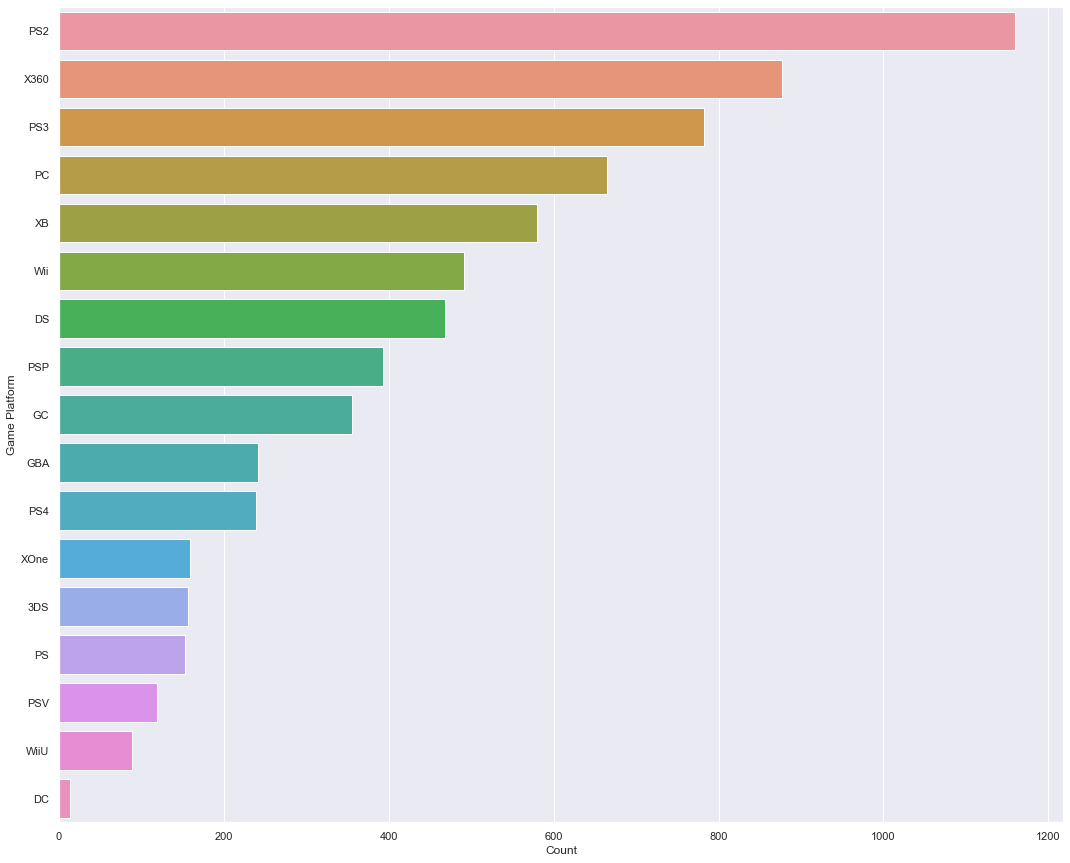

In [87]:
platform_count = pd.DataFrame()
platform_count = videoGamesSelectedCleaned.loc[:,'Platform'].value_counts()
platform_count = platform_count.to_frame()
platform_count['Game Platform'] = platform_count.index
platform_count = platform_count.rename(columns = {'Platform' : 'Count'})

plt.figure(figsize=(18, 15))
sb.set(font_scale = 1)
sb.barplot(data = platform_count, x = 'Count', y = 'Game Platform')
plt.show()

### visualisation for Publisher

In [88]:
videoGamesSelectedCleaned['Publisher'].nunique()
videoGamesSelectedCleaned['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'SquareSoft',
       'GT Interactive', 'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', '505 Games', 'Capcom',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'RedOctane', 'Atari', 'Eidos Interactive', 'Namco Bandai Games',
       'Vivendi Games', 'MTV Games', 'Sega', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment',
       'Midway Games', 'Deep Silver', 'NCSoft', 'Tecmo Koei',
       'Valve Software', 'Infogrames', 'Mindscape', 'Valve',
       'Hello Games', 'Global Star', 'Gotham Games',
       'Crave Entertainment', 'Hasbro Interactive', 'Codemasters',
       'TDK Mediactive', 'Zoo Games', 'Sony Online Entertainment', 'RTL',
       'D3Publisher', 'Unknown', 'Black Label G

In [89]:
videoGamesPublisher=videoGamesSelectedCleaned.groupby('Publisher')
videoGamesPublisher=videoGamesPublisher.filter(lambda x:len(x)>=50)
videoGamesPublisher

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating,JP_Sales
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E,3.77
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E,3.79
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E,3.28
6,DS,Platform,Nintendo,89.0,29.80,8.5,E,6.50
7,Wii,Misc,Nintendo,58.0,28.92,6.6,E,2.93
...,...,...,...,...,...,...,...,...
16644,PC,Strategy,Codemasters,51.0,0.01,3.8,E10+,0.00
16656,WiiU,Action,Nintendo,81.0,0.01,8.5,E,0.00
16677,GBA,Fighting,Midway Games,81.0,0.01,8.8,M,0.00
16696,PC,Action,Konami Digital Entertainment,80.0,0.01,7.6,M,0.00


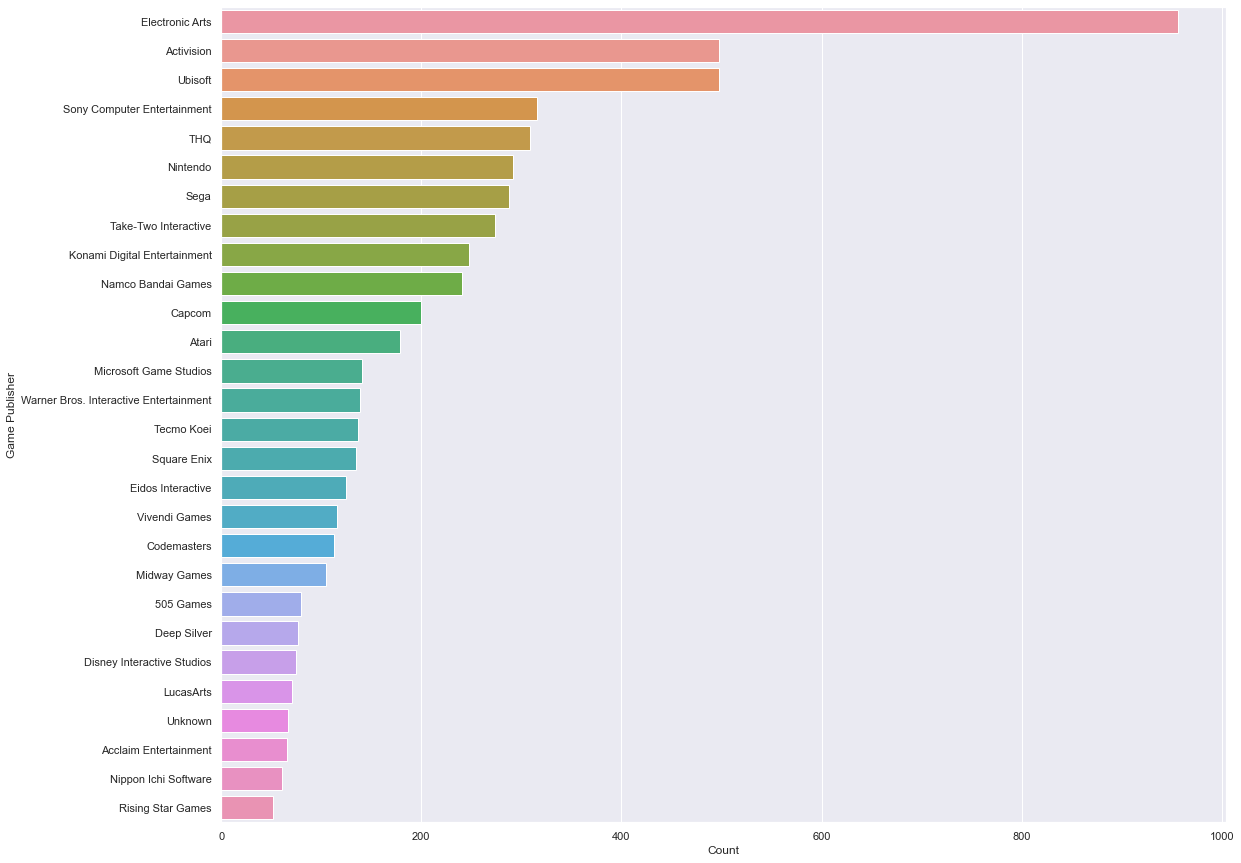

In [90]:
publisher_count = pd.DataFrame()
publisher_count = videoGamesPublisher.loc[:,'Publisher'].value_counts()
publisher_count = publisher_count.to_frame()
publisher_count['Game Publisher'] = publisher_count.index
publisher_count = publisher_count.rename(columns = {'Publisher' : 'Count'})

plt.figure(figsize=(18, 15))
sb.set(font_scale = 1)
sb.barplot(data = publisher_count, x = 'Count', y = 'Game Publisher')
plt.show()

<AxesSubplot:xlabel='Global_Sales', ylabel='Publisher'>

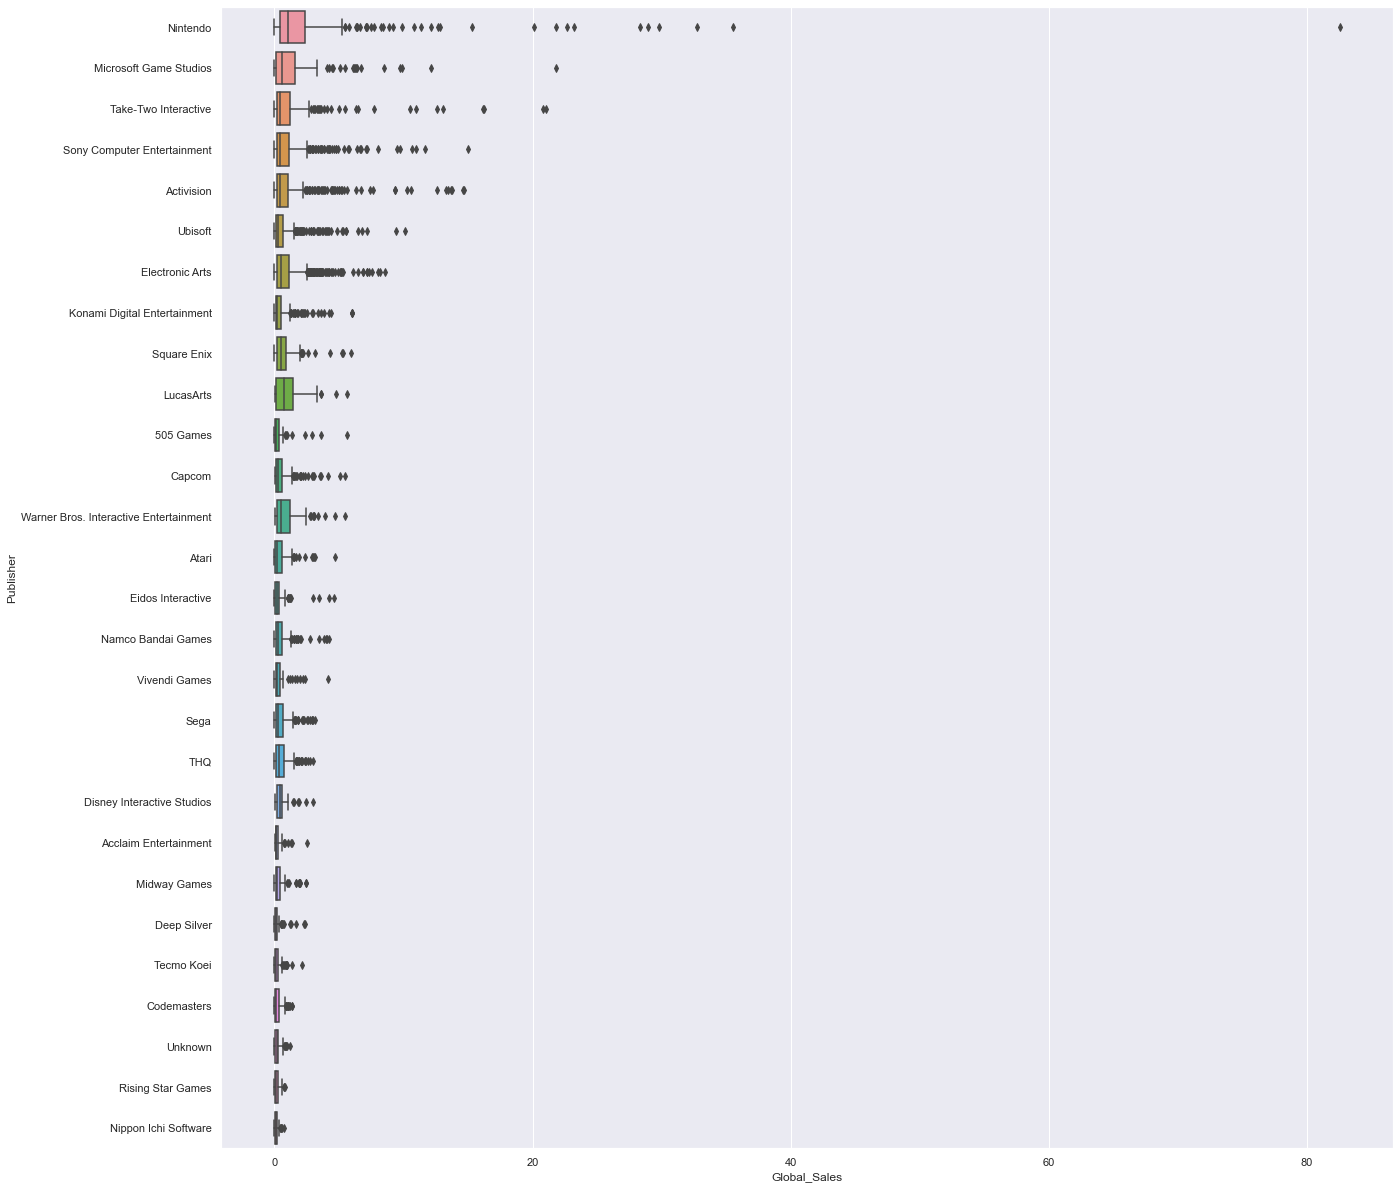

In [91]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Publisher', orient='h', data = videoGamesPublisher)

In [92]:
def right(s):
    Q1=s.quantile(0.25)
    Q3=s.quantile(0.75)
    IQR=Q3-Q1
    return Q3+IQR
    
def left(s):
    Q1=s.quantile(0.25)
    Q3=s.quantile(0.75)
    IQR=Q3-Q1
    return Q1-IQR

### For companies with over 50 sales

In [93]:
def removeOutliers(df,predictor,response):
    videoGamesPublisherGrouped=df.groupby(predictor)#['Global_Sales']
    whiskers=videoGamesPublisherGrouped[response].apply(lambda x: [left(x),right(x)]).apply(pd.Series)
    whiskers.columns=['left','right']
    merge=pd.merge(df,whiskers,on=predictor)
    videoGamesPublisherGrouped=merge[(merge[response]<=(merge['right'])) &
                                     (merge[response]>=(merge['left']))]
    f=plt.figure(figsize=(21,21))
    sb.boxplot(x=response, y = predictor, orient='h', data = videoGamesPublisherGrouped, 
          order= videoGamesPublisherGrouped.groupby(predictor)[response].median().sort_values(ascending=False).index)

## not complete but I think this can only be applied to numeric data i.e. critic score
def checkSkew(df,predictor):
  groupedDf=df.groupby(predictor)
  uniquePredictors=df[predictor].unique()
  for i in uniquePredictors:
    print(i, groupedDf[i].skew())

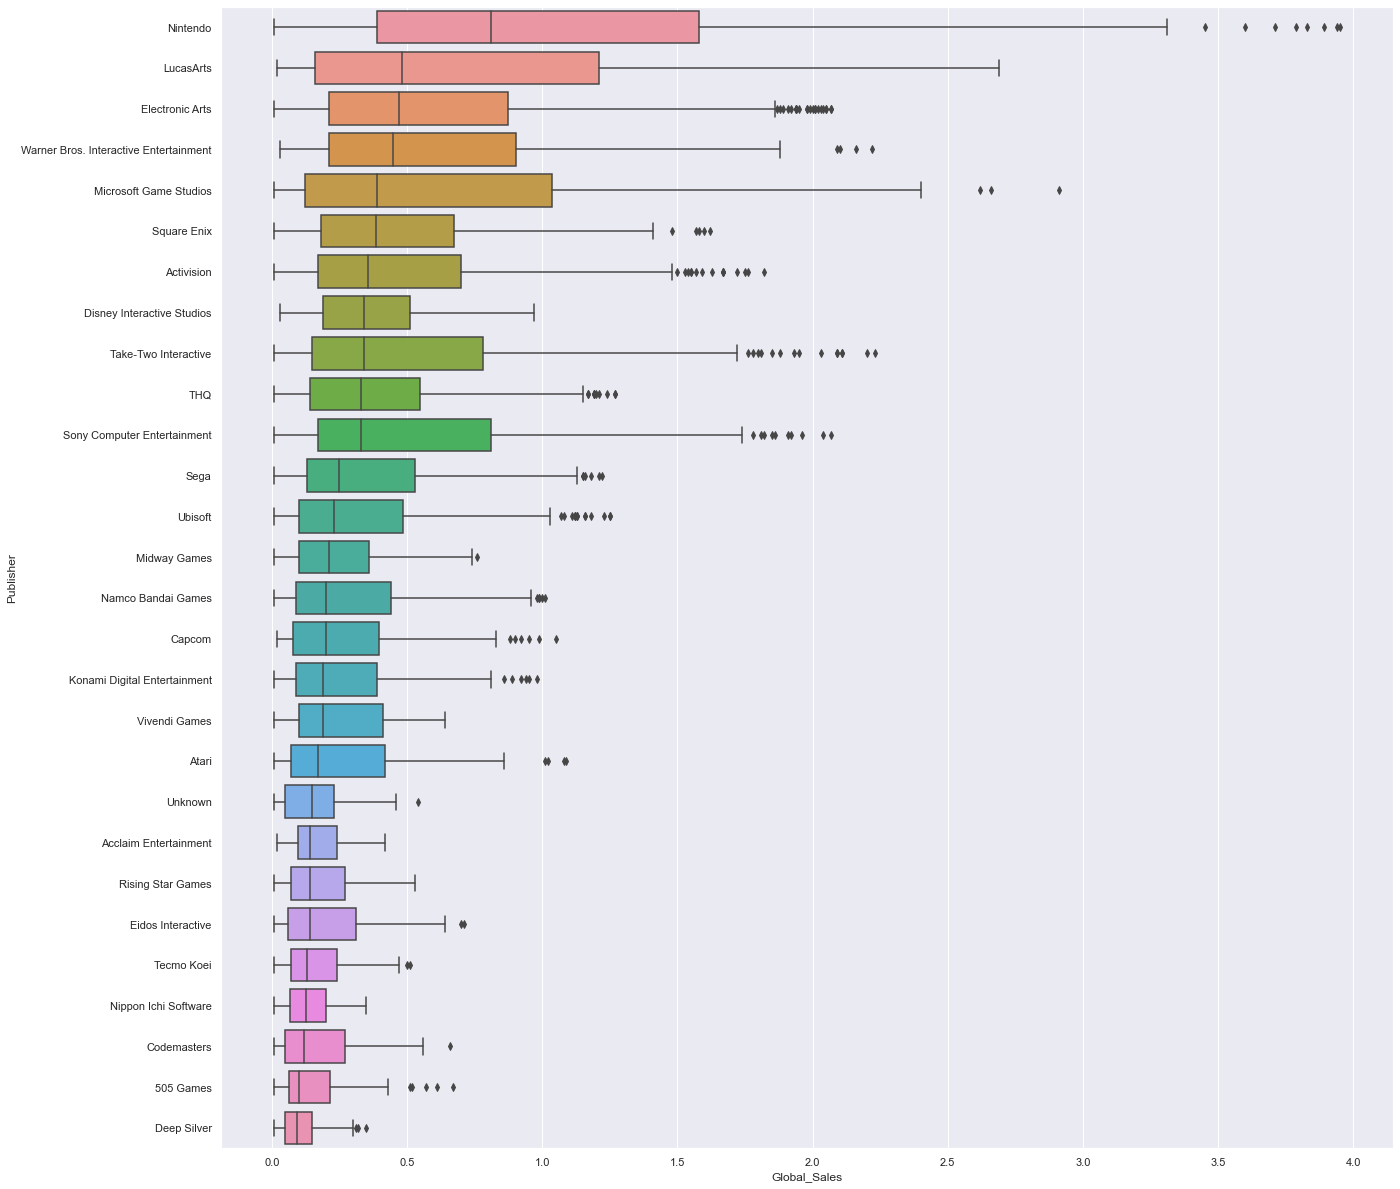

In [94]:
removeOutliers(videoGamesPublisher,'Publisher','Global_Sales')

### Visualisation for Genre

In [95]:
videoGamesSelectedCleaned['Genre'].nunique()

12

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

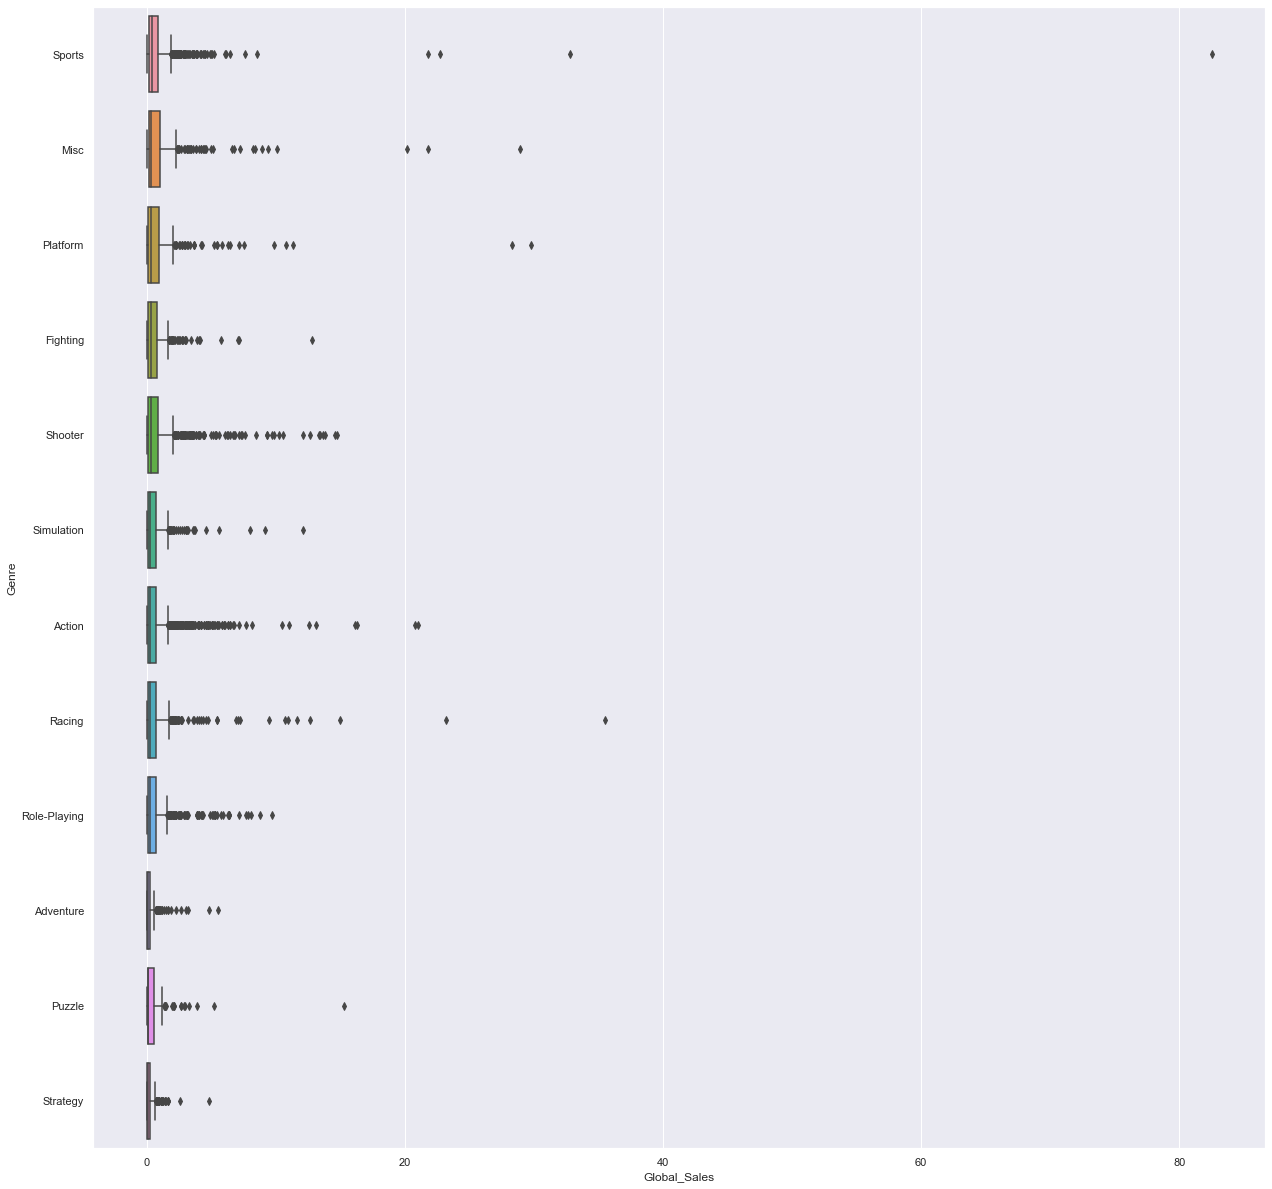

In [96]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Genre', orient='h', data = videoGamesSelectedCleaned, 
          order= videoGamesSelectedCleaned.groupby('Genre')['Global_Sales'].median().sort_values(ascending=False).index)


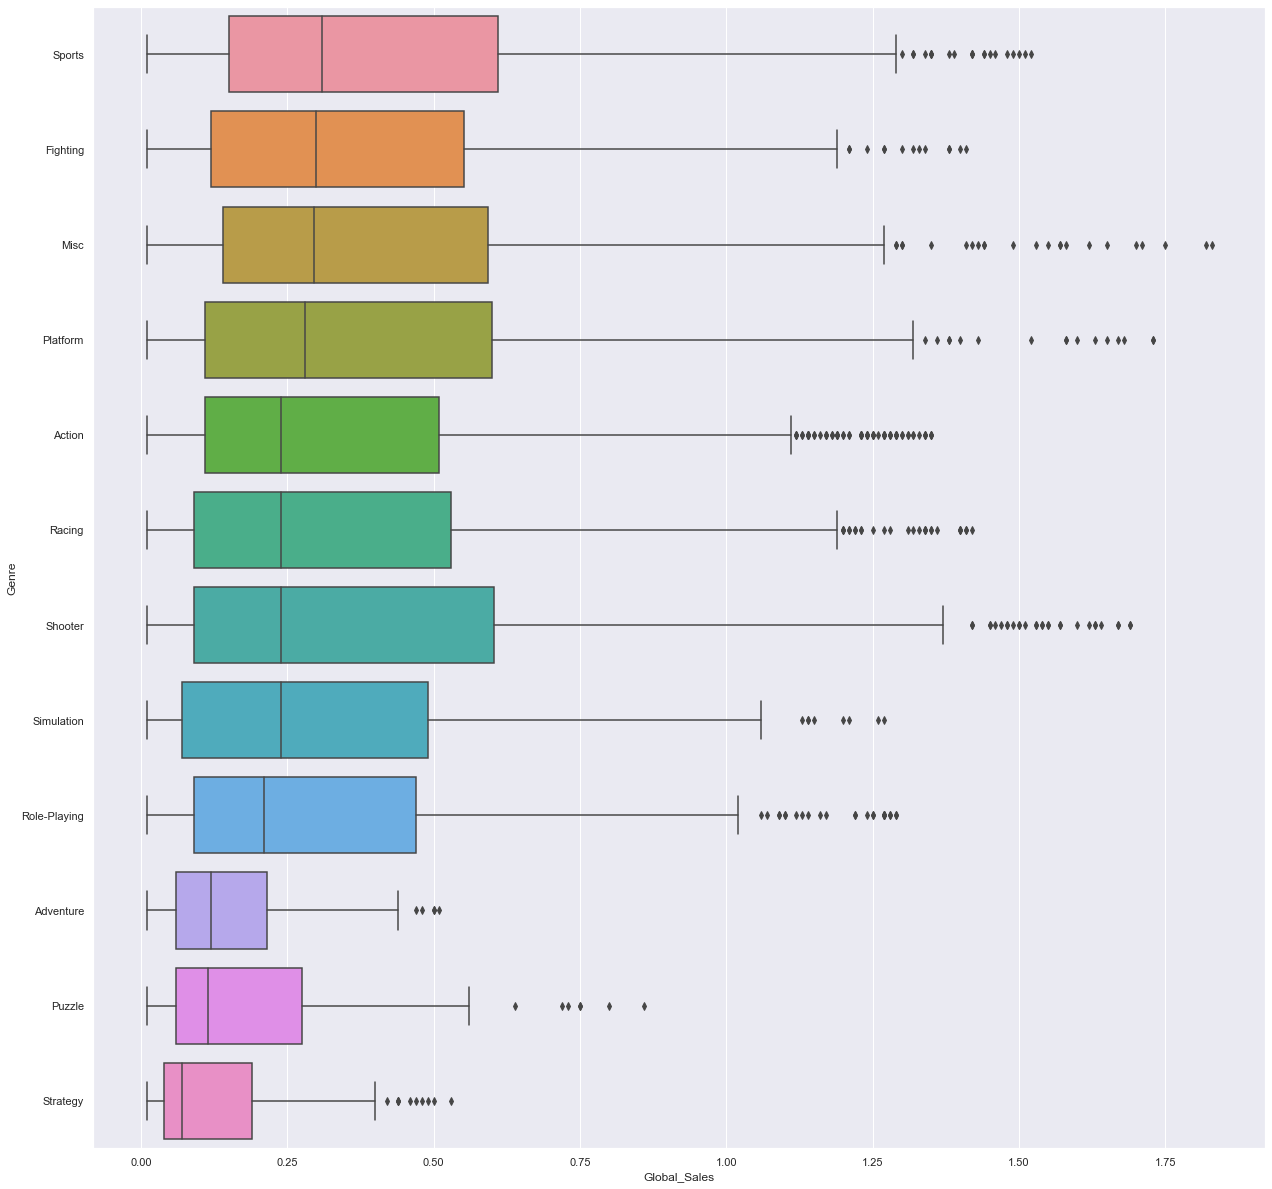

In [97]:
removeOutliers(videoGamesSelectedCleaned,'Genre','Global_Sales')

## reasonable distinctness?

### For platform

In [98]:
videoGamesSelectedCleaned['Platform'].nunique()

17

<AxesSubplot:xlabel='Global_Sales', ylabel='Platform'>

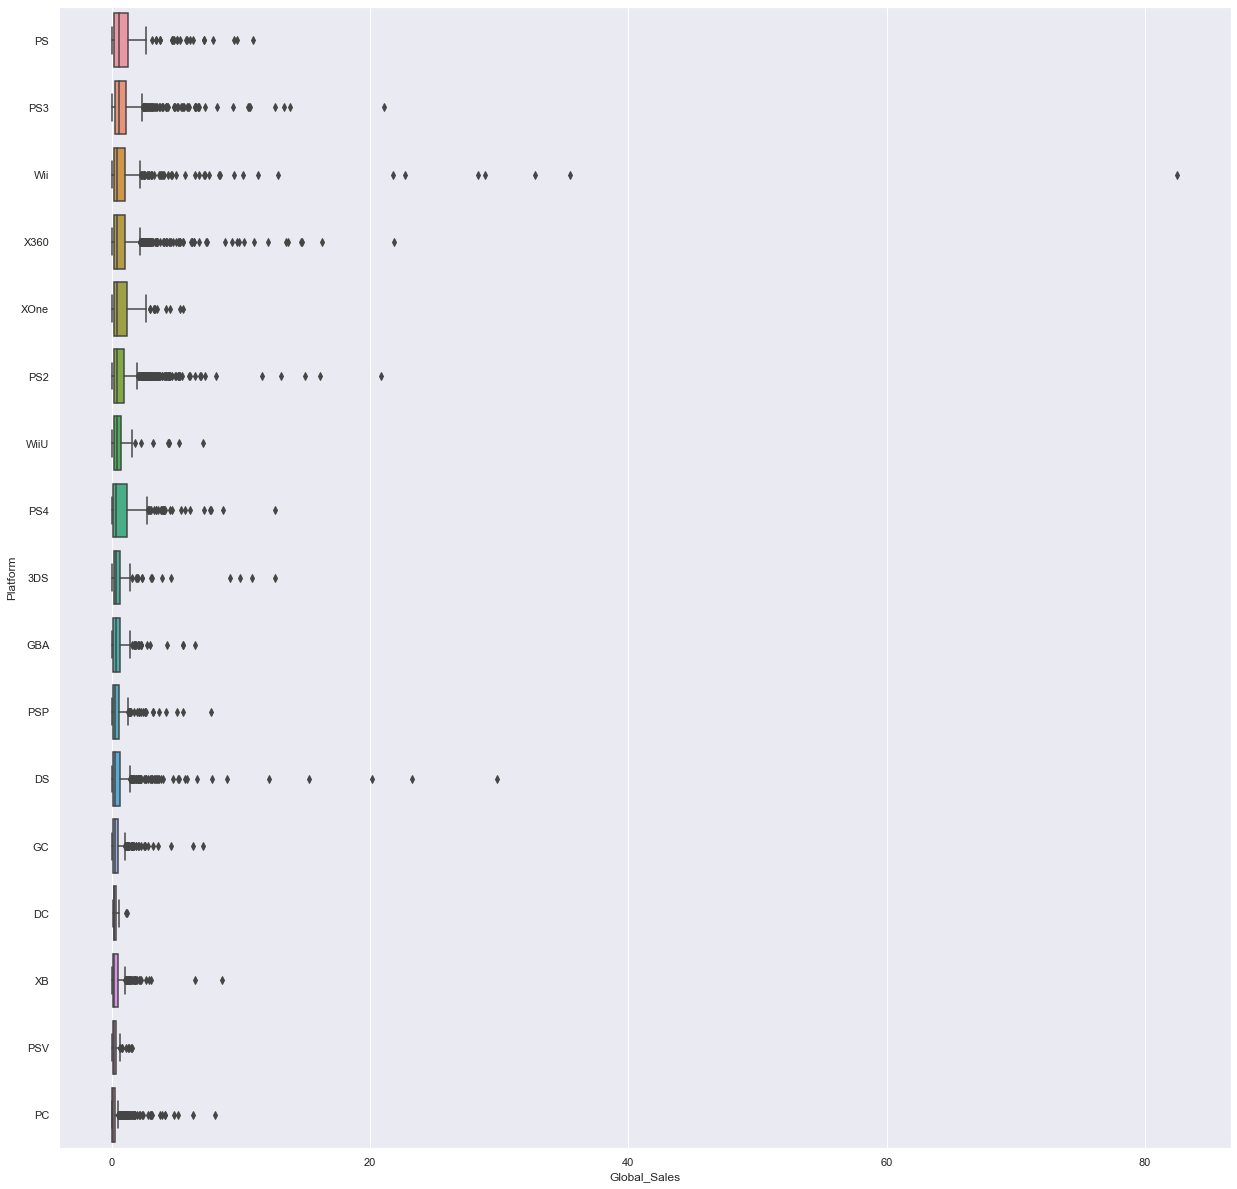

In [99]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Platform', orient='h', data = videoGamesSelectedCleaned, 
          order= videoGamesSelectedCleaned.groupby('Platform')['Global_Sales'].median().sort_values(ascending=False).index)


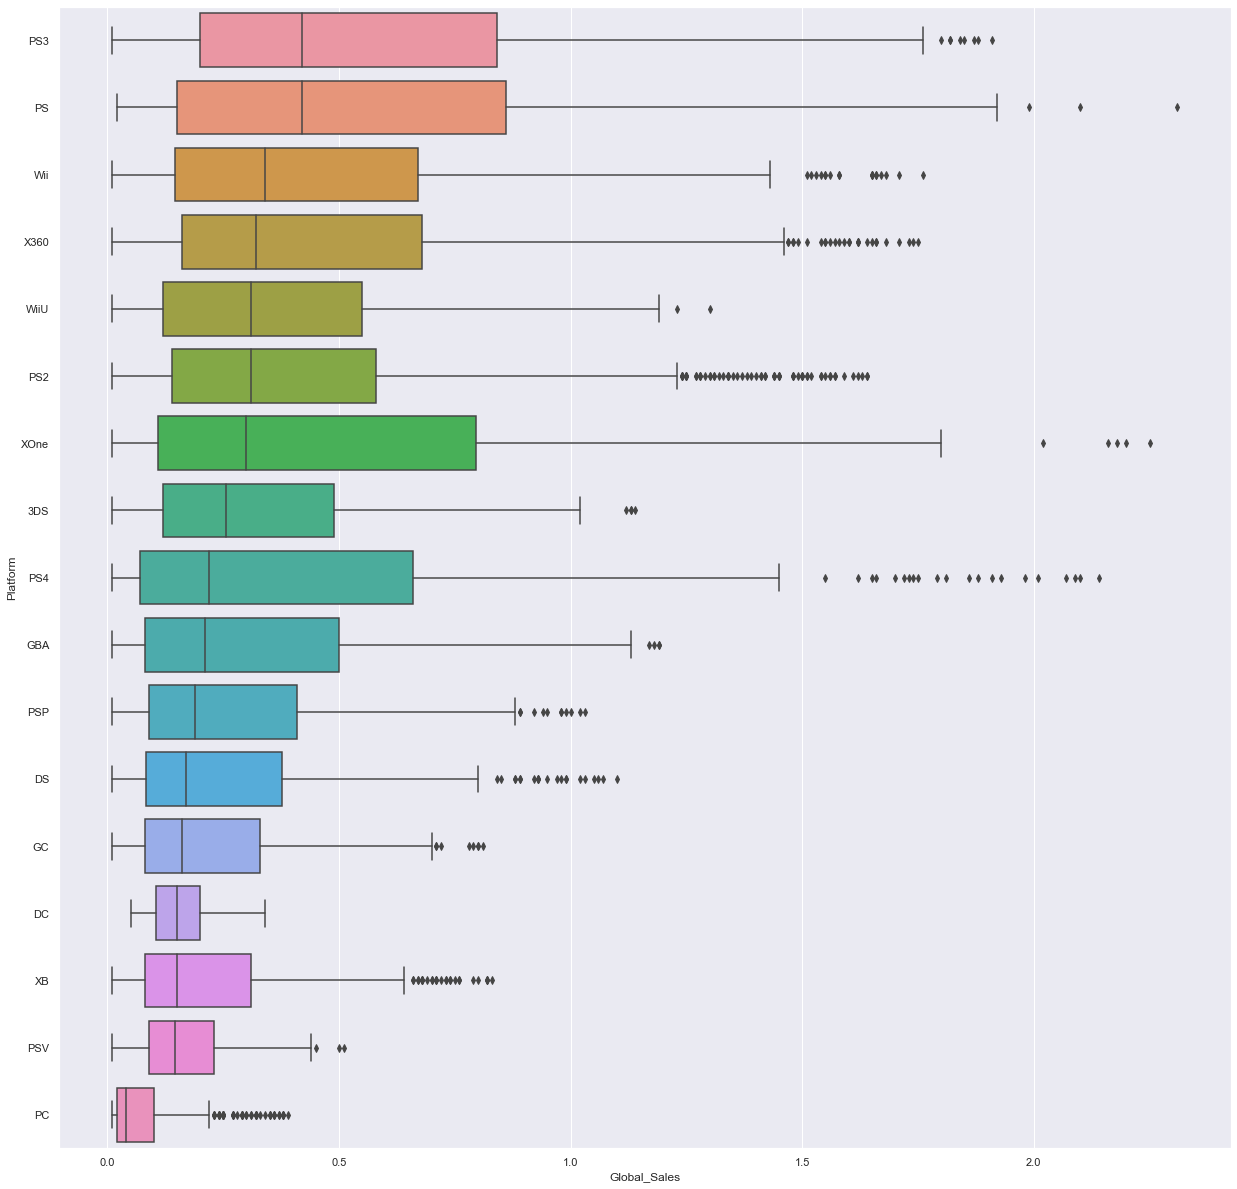

In [100]:
removeOutliers(videoGamesSelectedCleaned,'Platform','Global_Sales')

## 5. Machine Learning Models

### 1. Correlation

In [101]:
scoreSales=videoGamesSelectedCleaned[['Critic_Score','Global_Sales']]

In [102]:
scoreSales.corr()

,Critic_Score,Global_Sales
Critic_Score,1.000000,0.237459
Global_Sales,0.237459,1.000000


<AxesSubplot:xlabel='Global_Sales', ylabel='Critic_Score'>

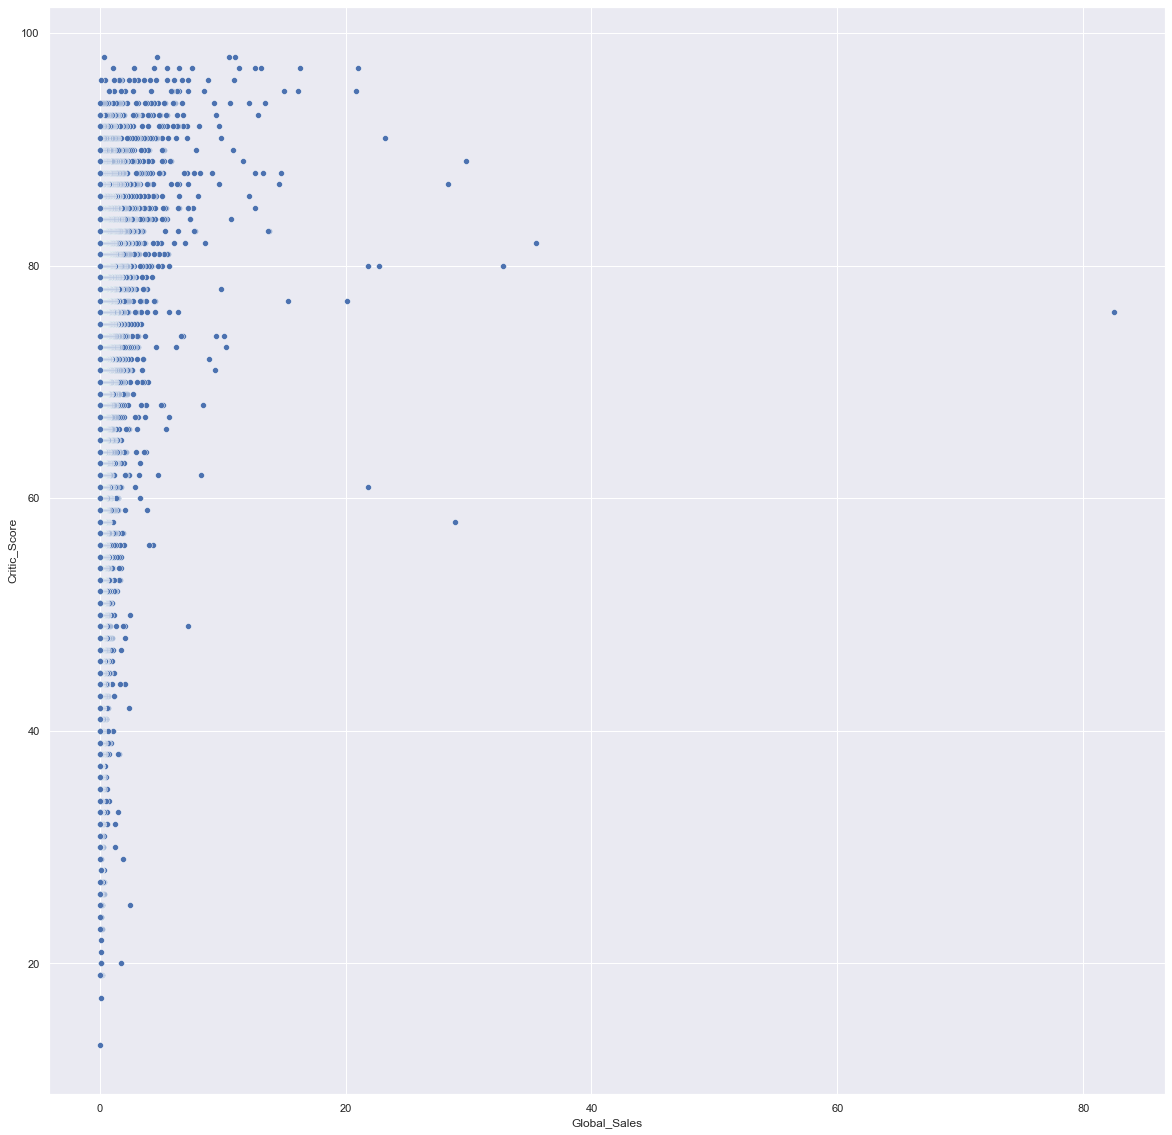

In [103]:
plt.figure(figsize=(20, 20))
sb.scatterplot(videoGamesSelectedCleaned, y = "Critic_Score", x = "Global_Sales")

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

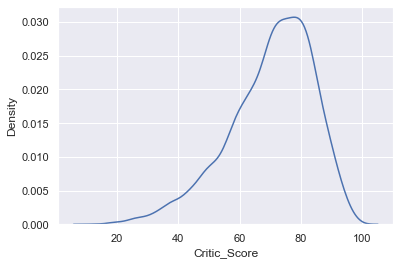

In [104]:
sb.kdeplot(data=scoreSales['Critic_Score'])

## got .25 corr not great


## userscore corr

In [105]:
scoreSales=videoGamesSelectedCleaned[['User_Score','Global_Sales']]
scoreSales.corr()


,User_Score,Global_Sales
User_Score,1.000000,0.088561
Global_Sales,0.088561,1.000000


### 2. Linear Regression

In [106]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

# Create a Linear Regression object
linreg = LinearRegression()



train = videoGamesSelectedCleaned.sample(frac=.8)
test = videoGamesSelectedCleaned.drop(train.index)


cs_train = pd.DataFrame(train['Critic_Score'])
cs_test = pd.DataFrame(test['Critic_Score'])
gs_train = pd.DataFrame(train['Global_Sales'])
gs_test = pd.DataFrame(test['Global_Sales'])


Intercept of Regression 	: b =  [-1.57065055]
Coefficients of Regression 	: a =  [[0.0333242]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.05274596777816898
Mean Squared Error (MSE) 	: 3.7714536609501583

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07521371475322092
Mean Squared Error (MSE) 	: 2.841193363874421



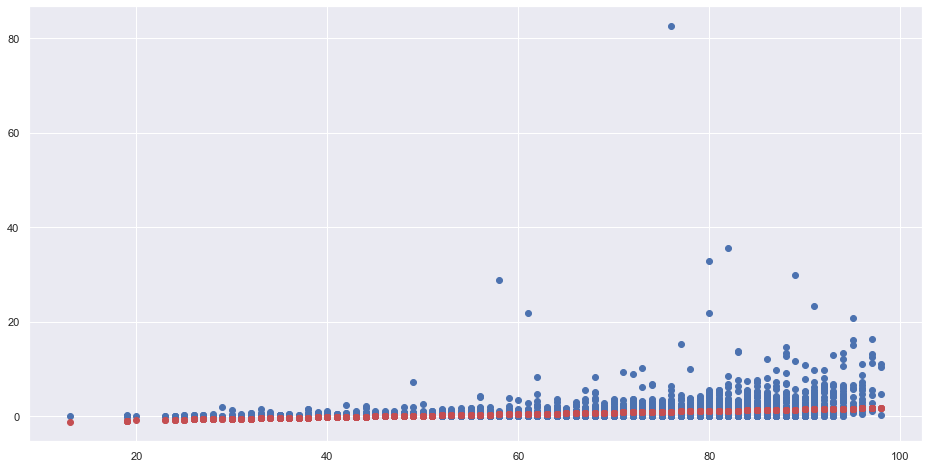

In [107]:

linreg.fit(cs_train, gs_train)
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
gs_train_pred = linreg.predict(cs_train)
gs_test_pred = linreg.predict(cs_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cs_train, gs_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(gs_train, gs_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cs_test, gs_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(gs_test, gs_test_pred))
print()


f = plt.figure(figsize=(16, 8))
plt.scatter(cs_train, gs_train)
plt.scatter(cs_train, gs_train_pred, color = "r")
plt.show()

### 3. Decision Tree

Predicting Rating by global sales

Train Classification Accuracy: 0.39539070939863163
Test Classification Accuracy: 0.34485241180705545


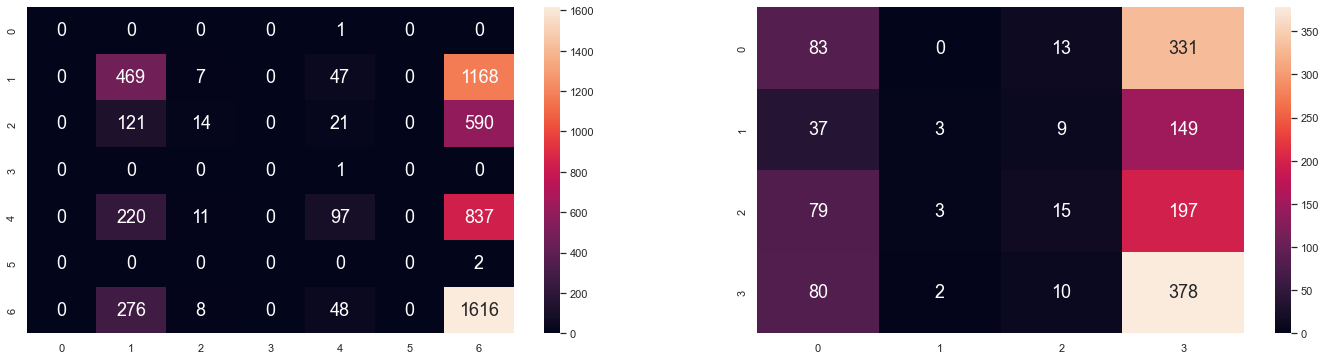

In [108]:
ra_train = pd.DataFrame(train['Rating'])
ra_test = pd.DataFrame(test['Rating'])
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object

dectree2 = DecisionTreeClassifier(max_depth = 8)

# Train the Decision Tree Classifier model

dectree2.fit(gs_train,ra_train)



from sklearn.tree import export_graphviz
dot_data2 = export_graphviz(dectree2, out_file=None, 
                                feature_names = gs_train.columns,
                                filled=True,
                               class_names=['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'])


import graphviz                          
graphviz.Source(dot_data2)

train_pred2 = dectree2.predict(gs_train)
test_pred2 = dectree2.predict(gs_test)

print("Train Classification Accuracy:",dectree2.score(gs_train,ra_train))
print("Test Classification Accuracy:",dectree2.score(gs_test,ra_test))
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()




Predicting Rating by Genre and global_sales

Train Classification Accuracy: 0.5869643500180051
Test Classification Accuracy: 0.5543556515478761


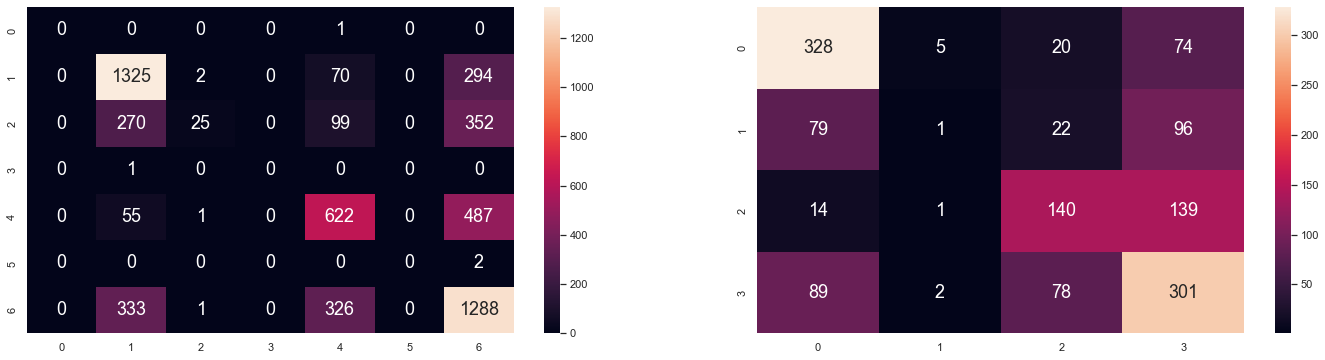

In [109]:
gegs_train = pd.DataFrame(train[['Genre','Global_Sales']])
gegs_test = pd.DataFrame(test[['Genre','Global_Sales']])
type(gegs_train)
gegs_train['Genre'].replace(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)

gegs_test['Genre'].replace(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)

dectree2.fit(gegs_train,ra_train)

dot_data2 = export_graphviz(dectree2, out_file=None, 
                                feature_names = gegs_train.columns,
                                filled=True,
                               class_names=['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'])

train_pred2 = dectree2.predict(gegs_train)
test_pred2 = dectree2.predict(gegs_test)
print("Train Classification Accuracy:",dectree2.score(gegs_train,ra_train))
print("Test Classification Accuracy:",dectree2.score(gegs_test,ra_test))
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()

### 4. Random Forest

/var/folders/yj/l95wc2mx1_df64tb2z4pwhzw0000gn/T/ipykernel_36307/2668834011.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(gs_train,ra_train)


Train Classification Accuracy: 0.4072740367302845
Test Classification Accuracy: 0.3484521238300936


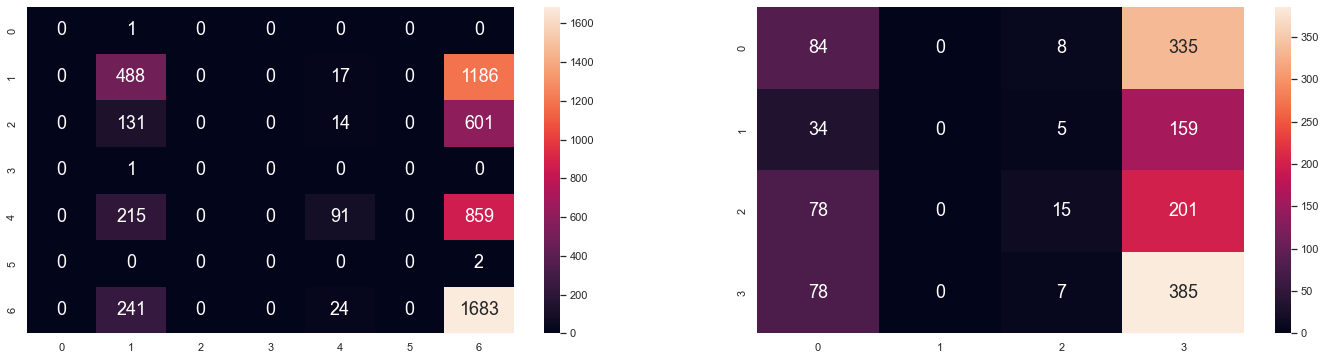

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)
rfc.fit(gs_train,ra_train)
train_pred2 = rfc.predict(gs_train)
test_pred2 = rfc.predict(gs_test)
print("Train Classification Accuracy:",rfc.score(gs_train,ra_train))
print("Test Classification Accuracy:",rfc.score(gs_test,ra_test))
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()


### 5. Neural Network

Neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

Neural networks are flexible and can be used for both classification and regression. So we want to discover whether it will be better for our prediction.

/Users/jinqingyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Classification Accuracy: 0.36532229024126756
Test Classification Accuracy: 0.3513318934485241


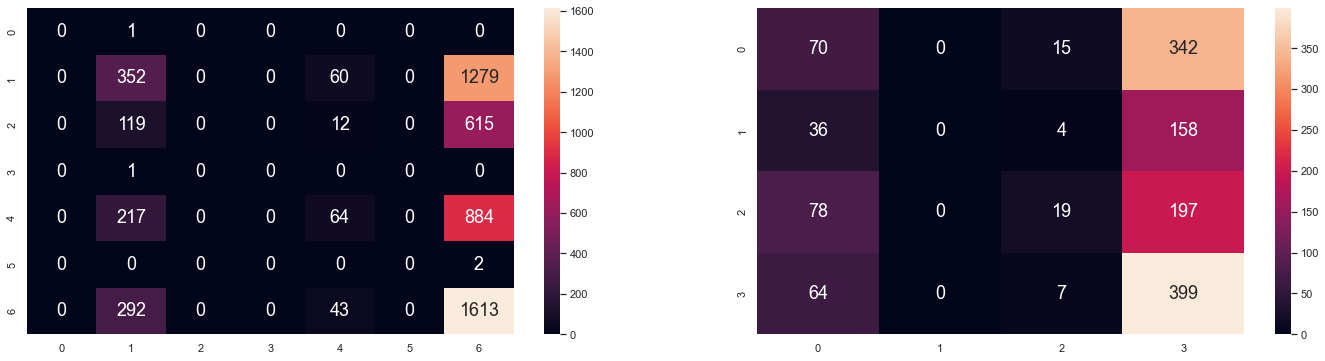

In [111]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=500,activation = 'relu',solver='adam',random_state=1)
mlp.fit(gs_train,ra_train)
train_pred2 = mlp.predict(gs_train)
test_pred2 = mlp.predict(gs_test)
print("Train Classification Accuracy:",mlp.score(gs_train,ra_train))
print("Test Classification Accuracy:",mlp.score(gs_test,ra_test))
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()


## 6. Additional Research Question

Assume that there is a Japan developer who wants tp publish a game in the global market, based on the data, what kind of game should he/she publish?
Nintendo is the largest game developer in Japan, therefore in our analysis, we will only consider the games published by Nintendo.

In [112]:
# Select the games published by Nintendo
japan_data = videoGamesSelectedCleaned[videoGamesSelectedCleaned['Publisher'] == 'Nintendo']

In [113]:
# View all the genres of the games published by Nintendo
japan_data['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Puzzle', 'Fighting',
       'Simulation', 'Role-Playing', 'Action', 'Shooter', 'Adventure',
       'Strategy'], dtype=object)

There are total of 12 genres of games, we can try to combine some of them to make the analysis easier.
We can combine the genres of 'Fighting', 'Shooter', 'Sports', 'Racing' 'Action' into one genre 'Action'.
We can combine the genres of 'Puzzle', 'Simulation', 'Strategy' into one genre 'Puzzle'.
We can combine the genres of 'Role-Playing', 'Adventure' into one genre 'Adventure'.

/var/folders/yj/l95wc2mx1_df64tb2z4pwhzw0000gn/T/ipykernel_36307/2856064801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_data['Genre'] = japan_data['Genre'].replace(['Fighting', 'Shooter', 'Sports', 'Racing', 'Action'], 'Action')
/var/folders/yj/l95wc2mx1_df64tb2z4pwhzw0000gn/T/ipykernel_36307/2856064801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_data['Genre'] = japan_data['Genre'].replace(['Puzzle', 'Simulation', 'Strategy'], 'Puzzle')
/var/folders/yj/l95wc2mx1_df64tb2z4pwhzw000

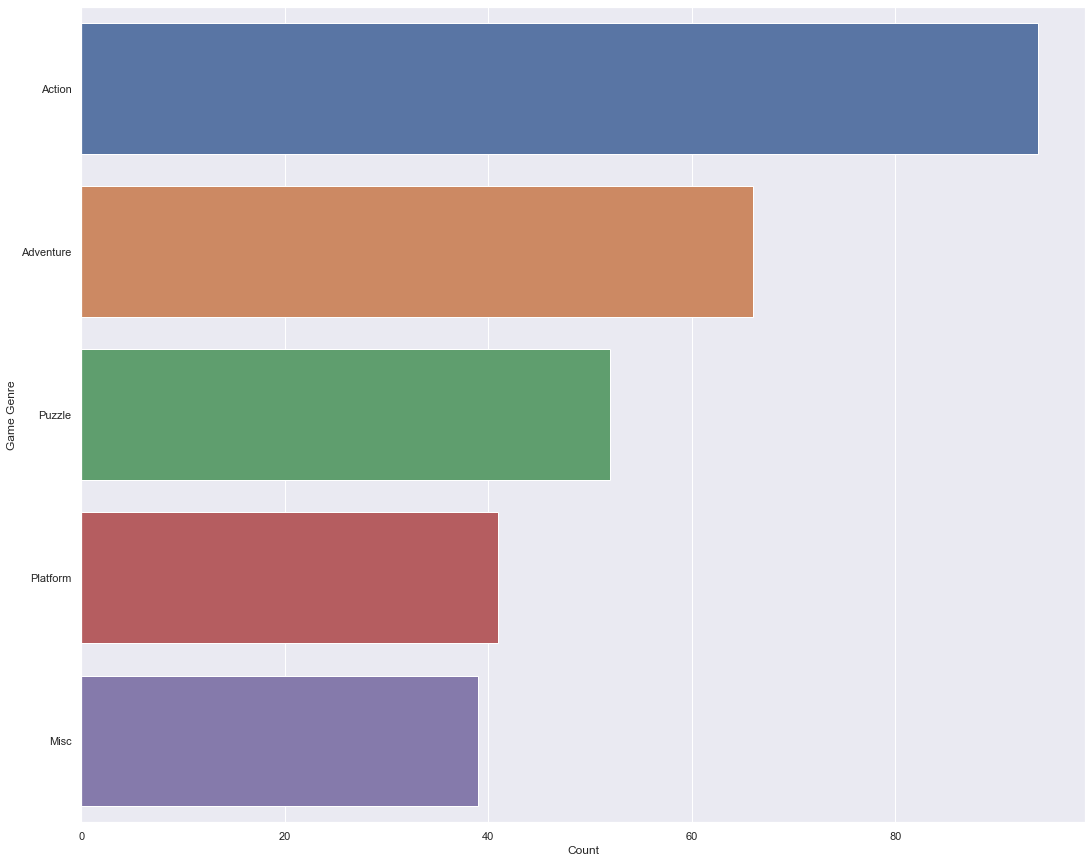

In [114]:
# Merge the genres into 4 categories
japan_data['Genre'] = japan_data['Genre'].replace(['Fighting', 'Shooter', 'Sports', 'Racing', 'Action'], 'Action')
japan_data['Genre'] = japan_data['Genre'].replace(['Puzzle', 'Simulation', 'Strategy'], 'Puzzle')
japan_data['Genre'] = japan_data['Genre'].replace(['Role-Playing', 'Adventure'], 'Adventure')

# View the new genres
japan_count = pd.DataFrame()
japan_count = japan_data.loc[:,'Genre'].value_counts()
japan_count = japan_count.to_frame()
japan_count['Game Genre'] = japan_count.index
japan_count = japan_count.rename(columns = {'Genre' : 'Count'})

plt.figure(figsize=(18, 15))
sb.set(font_scale = 1)
sb.barplot(data = japan_count, x = 'Count', y = 'Game Genre')
plt.show()

From the bar plot, we can see that the most popular genre of games published by Nintendo is 'Action' games, followed by 'Puzzle' games and 'Adventure' games.

Then, we move on to find the correlation between japan sales and global sales.

In [115]:
NA_Global=japan_data[['JP_Sales','Global_Sales']]
NA_Global.corr()

,JP_Sales,Global_Sales
JP_Sales,1.000000,0.738087
Global_Sales,0.738087,1.000000


The correlation between Japan sales and global sales is 0.738, which is a strong positive correlation.

Then, we can convert the genre of the games into dummy variables, such that genre can be converted as a numeric variable.

In [116]:
japan_data = pd.get_dummies(japan_data, columns=['Genre'])
japan_data.head()

,Platform,Publisher,Critic_Score,Global_Sales,User_Score,Rating,JP_Sales,Genre_Action,Genre_Adventure,Genre_Misc,Genre_Platform,Genre_Puzzle
0,Wii,Nintendo,76.0,82.53,8.0,E,3.77,1,0,0,0,0
2,Wii,Nintendo,82.0,35.52,8.3,E,3.79,1,0,0,0,0
3,Wii,Nintendo,80.0,32.77,8.0,E,3.28,1,0,0,0,0
6,DS,Nintendo,89.0,29.80,8.5,E,6.50,0,0,0,1,0
7,Wii,Nintendo,58.0,28.92,6.6,E,2.93,0,0,1,0,0
